In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd 
import numpy as np
from numpy.random import default_rng
import risktools as rt
from time import time


In [13]:
T = 10
sims = 10000
dt = 1/252

In [14]:
sigma = np.ones((int(T/dt), sims)) * 0.2

In [24]:
sigma[int(T/dt/2):,:] = 0.5

Half-life of theta in days =  87.3365447505531


<AxesSubplot: >

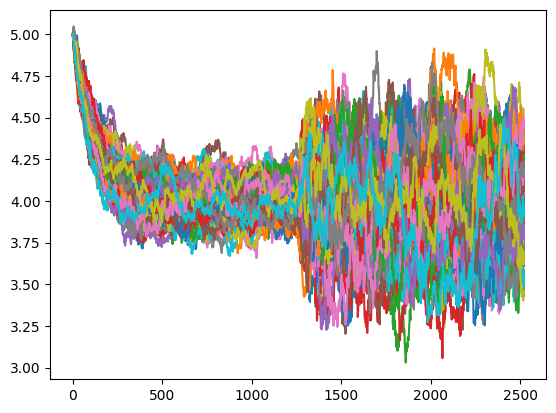

In [25]:
rt.simOU(sigma=sigma, log_price=False, sims=sims, T=T, dt=dt, c=False).iloc[:,:100].plot(legend=False)

Half-life of theta in days =  87.3365447505531


<AxesSubplot: >

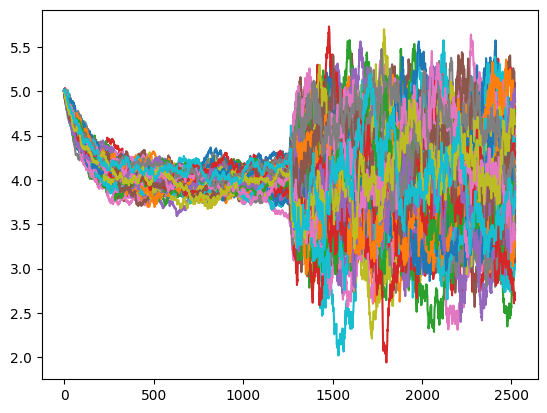

In [23]:
rt.simOU(sigma=sigma, log_price=False, sims=sims, T=T, dt=dt, c=True).iloc[:,:100].plot(legend=False)

Half-life of theta in days =  87.3365447505531


<AxesSubplot: >

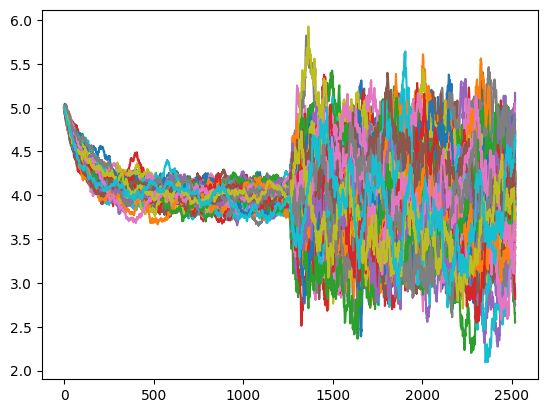

In [ ]:
rt.simOU(sigma=sigma, log_price=False, sims=sims, T=T, dt=dt, c=True).iloc[:,:100].plot(legend=False)

In [3]:
%%timeit -n1 -r3
rt.simOU(log_price=False, sims=sims, T=T, c=False)

Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
2.86 s ± 104 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [4]:
%%timeit -n1 -r3
rt.simOU(log_price=True, sims=sims, T=T, c=False)

Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
3.49 s ± 57.8 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [5]:
%%timeit -n1 -r3
rt.simOU(log_price=False, sims=sims, T=T, c=True)

Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
479 ms ± 4.74 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [6]:
%%timeit -n1 -r3
rt.simOU(log_price=True, sims=sims, T=T, c=True)

Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
517 ms ± 13 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [13]:
2.33/3.66

0.6366120218579235

In [8]:
from numpy.random import default_rng

In [9]:
rng = default_rng()

In [ ]:
rng.normal()

In [4]:
# x = rt.simGBM_MV(s0=[5,5], r=0.01, sigma=[0.2,0.2], T=1, dt=1/252, cor=[[1,0],[0,1]], sims=100)
# pd.DataFrame(x[:,:,0]).plot(legend=False)